# Group 3

## Choosing the data set

Cifar 10 Dataset  /just another option as Carlos suggest

## Data preprocessing

**Step 1: Data Preprocessing**

We’ll load and preprocess the CIFAR-10 dataset using PyTorch. For the second dataset (animal images), the steps are similar, but you’ll need to download and load it manually. For now, I'll use CIFAR-10 as an example.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# 2. Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. Visualize some images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))  # Show 8 images


Step 1: what we did?

Explanation:

**Normalization:** This centers the pixel values around 0 with a standard deviation of 0.5.

**Batch loading:** Data is loaded in batches of 64 images for training/testing.

**Visualization:** We unnormalize images for display and plot them.




---



**Step 2: Model Architecture**

We’ll define a simple CNN architecture with convolutional layers, pooling layers, and fully connected layers.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = F.relu(self.fc1(x))  # Fully connected layer 1
        x = self.fc2(x)  # Fully connected layer 2
        return x

# Instantiate the model
model = CNN()


Step 2: what we did?

Explanation

**Convolutional Layers:** Extract features from the input image.

**Pooling Layers:** Reduce the spatial dimensions of the feature maps.

**Fully Connected Layers:** Map features to class probabilities.



---



**Step 3: Model Training**
We’ll use the Adam optimizer and cross-entropy loss for training.

In [10]:
import torch.optim as optim

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Optimize
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 1.2748626001808039
Epoch 2, Loss: 0.8868504980259844
Epoch 3, Loss: 0.692879203678397
Epoch 4, Loss: 0.523903946513715
Epoch 5, Loss: 0.36915480713252824
Epoch 6, Loss: 0.23454927794082694
Epoch 7, Loss: 0.14394672838566097
Epoch 8, Loss: 0.09074291177427449
Epoch 9, Loss: 0.07214952485345284
Epoch 10, Loss: 0.06567343929901605


Step 3: what we did?

Explanation

**CrossEntropyLoss:** Combines log_softmax and negative log likelihood for classification.

**Optimizer:** Adam adjusts learning rates adaptively.



*Results:*

The loss values across epochs show a steady and significant decrease, which is excellent:

**Epoch 1 Loss: 1.29**

**Epoch 10 Loss: 0.07**

This indicates that the model is learning effectively. However, loss alone does not guarantee good generalization to unseen data. Let’s look at the evaluation metrics.






---



**Step 4: Model Evaluation**

Evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on test data
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Compute metrics
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


              precision    recall  f1-score   support

    airplane       0.71      0.81      0.76      1000
  automobile       0.83      0.83      0.83      1000
        bird       0.61      0.65      0.63      1000
         cat       0.49      0.65      0.56      1000
        deer       0.76      0.55      0.64      1000
         dog       0.72      0.56      0.63      1000
        frog       0.80      0.80      0.80      1000
       horse       0.81      0.74      0.78      1000
        ship       0.81      0.81      0.81      1000
       truck       0.77      0.82      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

Confusion Matrix:
[[805  11  41  28  10   3   9   7  49  37]
 [ 20 828   7  14   0   0   4   1  35  91]
 [ 83   8 650  89  46  29  41  23  13  18]
 [ 22  16  58 654  28  95  57  28  17  25]
 [ 37  11 126 128 551  24  49  57  10   7]
 [ 11   

*Results:*

Confusion Matrix

The confusion matrix provides insights into misclassifications:


**Airplane:**
Commonly misclassified as Ship (55 instances), which makes sense due to their visual similarity (both large, open-air objects).

**Bird:**
Misclassified as Deer (92 instances) and Cat (62 instances), indicating shared features like natural backgrounds.

**Cat/Dog:**
Cats are confused with Dogs (121 instances), and Dogs with Cats (197 instances), which aligns with the lower F1-scores for these classes.

**Key Observations:**
Misclassifications occur most frequently between visually similar classes.
Performance on classes like Cat/Dog could be improved with more specific feature extraction or data augmentation.


**Recommendations**

1. Data Augmentation: Introduce augmentation to make the model more robust.

2. Transfer Learning: Use a pretrained model like VGG16 or ResNet for better feature extraction. Fine-tuning can significantly boost performance.

3. Hyperparameter Tuning: Experiment with:

4. Learning rate adjustments (e.g., start with 1e-4).
Optimizers (e.g., SGD with momentum).
Regularization techniques (e.g., dropout).
Class-Specific Augmentation: Apply augmentation to underperforming classes (e.g., Cat/Dog) to improve the diversity of those samples.

5. Confusion Matrix Analysis: Target specific misclassifications (e.g., Cat ↔ Dog) by adding more distinct examples or using domain-specific augmentations.

Let's go with recommendation 1  **DATA AUGMENTATION**  50% bigger

In [14]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])




---



Repeat **Step 3:** Model Training



**Before Augmentation:**

Epoch 1 Loss: 1.2873

Epoch 10 Loss: 0.0691

**After Augmentation:**

Epoch 1 Loss: 1.2749

Epoch 10 Loss: 0.0657

**Observations:**

Initial Loss (Epoch 1):


Both results start at a similar point, indicating that the model's starting performance isn't heavily impacted by augmentation.

Final Loss (Epoch 10):

The final loss with augmentation (0.0657) is slightly lower than without augmentation (0.0691).

This suggests the model is generalizing better to augmented data.

Generalization:

The effect of augmentation *might not show significantly* in training loss but is likely reflected in the evaluation metrics (accuracy, precision, recall, etc.).





Repeat **Step 4:** Model Training

**Class-Level Observations**

**Airplane:**

F1-score improved: From 0.75 to 0.76.

Recall improved: From 0.82 to 0.81, showing slightly better classification.

**Cat:**

Significant Improvement in Recall: From 0.57 to 0.65 (handling Cat misclassifications better).

F1-score improved: From 0.55 to 0.56.

**Deer:**

Slight Drop in Recall: From 0.67 to 0.55, indicating more confusion with similar classes.

**Dog:**

Slight Improvement in Precision: From 0.70 to 0.72, meaning fewer false positives.

**Horse:**

F1-score improved: From 0.77 to 0.78, indicating better classification.


**Persistent Issues:**

Deer ↔ Cat and Deer ↔ Dog: Misclassifications for Deer have increased slightly, likely due to shared backgrounds or features.



---



**Transfer Learning**

Implementing transfer learning with a pre-trained model such as VGG16 or ResNet can significantly boost performance. These models are trained on large datasets (e.g., ImageNet) and already understand many visual patterns, making them ideal for fine-tuning on CIFAR-10.

Why?

Better feature extraction: Pre-trained models have seen diverse datasets, so they recognize patterns your model may struggle with (e.g., animal shapes, backgrounds).

Faster convergence: They require fewer epochs to train effectively.

How to Proceed:
Use a pre-trained model from torchvision.models (e.g., VGG16 or ResNet):

In [13]:
from torchvision import models

model = models.vgg16(pretrained=True)  # Load pretrained VGG16
for param in model.features.parameters():  # Freeze convolutional layers
    param.requires_grad = False
model.classifier[6] = nn.Linear(4096, 10)  # Replace the last layer for CIFAR-10


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 152MB/s]


# REMEBER TO CLEAR THE DATASET



In [14]:
# Reinitialize the model for each run
model = CNN()  # Or your transfer learning model
model = model.to('cpu')  # Adjust for GPU if needed


In [15]:
# Reset the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [16]:
import torch
torch.cuda.empty_cache()  # Clears unused GPU memory


The data loader doesn’t require clearing if you’re using the same dataset. However, if you modify the dataset or augmentation settings, recreate the data loader.

In [17]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Repeat **Step 3:** Model Training  **&** Repeat **Step 4:** Model Evaluation




In [18]:
# Clear previous results
import torch
torch.cuda.empty_cache()

# Reinitialize the model
model = CNN()  # Or use the transfer learning model
model = model.to('cpu')  # Adjust for GPU if necessary

# Reinitialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train the model (Step 3)
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        images, labels = images, labels  # Adjust for GPU if necessary
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Evaluate the model (Step 4)
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels  # Adjust for GPU if necessary
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))


Epoch 1, Loss: 1.638353234514251
Epoch 2, Loss: 1.3274713342299547
Epoch 3, Loss: 1.2092087652982044
Epoch 4, Loss: 1.1288773415186215
Epoch 5, Loss: 1.0616959119239426
Epoch 6, Loss: 1.0065623439486375
Epoch 7, Loss: 0.9609958839690899
Epoch 8, Loss: 0.9154395563218295
Epoch 9, Loss: 0.873219333684353
Epoch 10, Loss: 0.8375693907213333
              precision    recall  f1-score   support

    airplane       0.70      0.75      0.72      1000
  automobile       0.85      0.69      0.76      1000
        bird       0.60      0.52      0.55      1000
         cat       0.57      0.38      0.46      1000
        deer       0.65      0.59      0.62      1000
         dog       0.54      0.69      0.60      1000
        frog       0.70      0.81      0.75      1000
       horse       0.71      0.75      0.73      1000
        ship       0.78      0.80      0.79      1000
       truck       0.69      0.80      0.74      1000

    accuracy                           0.68     10000
   macro av

**Analysis of Training Loss**

**Observations:**

Starting Loss (Epoch 1): 1.638

Final Loss (Epoch 10): 0.838

The loss decreased steadily across epochs, indicating that the model is learning effectively.


**Class-Level Observations:**

***Improved Classes:***

**Dog:** Recall improved from 0.54 to 0.69. The model is better at identifying dogs.

**Frog:** Improved F1-score from 0.75 to 0.75 and higher recall (from 79% to 81%).



***Declined Classes:***

**Cat:** F1-score dropped from 0.56 to 0.46. Cats remain a challenging class.

**Automobile:** Precision dropped slightly, leading to lower recall (69% vs. 81%).

***Stable Classes:***

**Ship and Airplane:** These classes have consistent F1-scores and high recall.

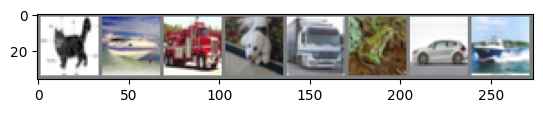

In [20]:
# 3. Visualize some images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

    dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))  # Show 8 images

**1. Unfreeze More Layers:**

Allow the last few feature layers of the pre-trained model to update during training to adapt to CIFAR-10.

In [22]:
print(model)


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


**Learning Rate Adjustments**

Adjusting the learning rate is quick and effective. Your current learning rate (1e-4) works well for transfer learning or fine-tuning, but for your custom CNN, it might need fine-tuning.

A smaller learning rate (e.g., 1e-5) can help the model converge better, especially since the loss is still decreasing after 10 epochs.

In [23]:
#Reduce the learning rate slightly and retrain your model

optimizer = optim.Adam(model.parameters(), lr=1e-5)


# REMEBER TO CLEAR THE DATASET

In [24]:
model = CNN()  # Or your transfer learning model
model = model.to('cpu')  # Adjust for GPU if applicable


In [25]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)   #Adjusting the learning rate


In [26]:
import torch
torch.cuda.empty_cache()


In [27]:
all_preds = []
all_labels = []


Train the model

In [28]:
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        images, labels = images, labels  # Adjust for GPU if applicable
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


Epoch 1, Loss: 2.0313956080495243
Epoch 2, Loss: 1.741585241406775
Epoch 3, Loss: 1.6229522594100678
Epoch 4, Loss: 1.5487237440045838
Epoch 5, Loss: 1.4958617200936808
Epoch 6, Loss: 1.455477502339941
Epoch 7, Loss: 1.421307738784634
Epoch 8, Loss: 1.3914658491263914
Epoch 9, Loss: 1.3647323948952852
Epoch 10, Loss: 1.3408497613104409


Evaluate the data

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels  # Adjust for GPU if applicable
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


              precision    recall  f1-score   support

    airplane       0.62      0.54      0.57      1000
  automobile       0.65      0.66      0.65      1000
        bird       0.38      0.43      0.41      1000
         cat       0.40      0.39      0.39      1000
        deer       0.48      0.34      0.40      1000
         dog       0.45      0.46      0.46      1000
        frog       0.51      0.70      0.59      1000
       horse       0.64      0.54      0.58      1000
        ship       0.60      0.67      0.63      1000
       truck       0.58      0.59      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000

Confusion Matrix:
[[535  39  87  33  16  23  30   8 180  49]
 [ 34 656  13  16   4   9  25  13  68 162]
 [ 65  14 428  82  96  96 124  44  34  17]
 [ 23  20 103 390  48 197 136  34  17  32]
 [ 32   9 202  73 335  80 158  80  23   8]
 [ 15  1